# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Setup Kaggle API Key

In [ ]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "obafemidolaposuccess"
kaggle_key = "977372879521bc618a0c06158c3c0f90"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [ ]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
import numpy as np
from autogluon.tabular import TabularPredictor

In [ ]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv')
train.loc[:,'datetime'] = pd.to_datetime(train.loc[:,'datetime'])
train.head()

<ipython-input-6-46bd9616bca2>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train.loc[:,'datetime'] = pd.to_datetime(train.loc[:,'datetime'])


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [ ]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv')
test.loc[:,'datetime'] = pd.to_datetime(test.loc[:,'datetime'])
test.head()

<ipython-input-9-61005ca095d1>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test.loc[:,'datetime'] = pd.to_datetime(test.loc[:,'datetime'])


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv')
submission.loc[:,'datetime'] = pd.to_datetime(submission.loc[:,'datetime'])
submission.head()

<ipython-input-10-bf13b9ecf9d6>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  submission.loc[:,'datetime'] = pd.to_datetime(submission.loc[:,'datetime'])


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [ ]:
predictor = TabularPredictor(label='count',
                             learner_kwargs={"ignored_columns":["casual","registered"]},
                             eval_metric='root_mean_squared_error').fit(train_data=train, 
                                                                                      time_limit=600, 
                                                                                      presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230612_063706/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230612_063706/"
AutoGluon Version:  0.7.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 11
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using F

### Review AutoGluon's training run with ranking of models that did the best.

In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.080362      26.614535  561.521869                0.001131           0.320857            3       True         13
1   RandomForestMSE_BAG_L2  -53.397775      21.092539  442.099129                0.968414          43.885305            2       True         12
2          LightGBM_BAG_L2  -55.031322      20.543190  436.363277                0.419065          38.149453            2       True         11
3        LightGBMXT_BAG_L2  -60.338735      25.225924  479.166255                5.101800          80.952430            2       True         10
4    KNeighborsDist_BAG_L1  -84.125061       0.045270    0.034078                0.045270           0.034078            1       True          2
5      WeightedEnsemble_L2  -84.125061       0.047871    0.831690         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -130.79295558247443

### Create predictions from test dataset

In [ ]:
predictions = predictor.predict(test)
predictions.head()

0    23.583586
1    41.951248
2    45.513992
3    48.749241
4    51.675186
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [ ]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.673485
std        90.070053
min         3.182094
25%        19.711159
50%        63.723526
75%       167.213364
max       366.156494
Name: count, dtype: float64

In [ ]:
# How many negative values do we have?
(predictions<0).sum()

0

In [ ]:
# Set them to zero


### Set predictions to submission dataframe, save, and submit

In [ ]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv')
submission.loc[:,'datetime'] = pd.to_datetime(submission.loc[:,'datetime'])
submission.head()

<ipython-input-17-bf13b9ecf9d6>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  submission.loc[:,'datetime'] = pd.to_datetime(submission.loc[:,'datetime'])


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [ ]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)
submission.head()

,datetime,count
0,2011-01-20 00:00:00,23.583586
1,2011-01-20 01:00:00,41.951248
2,2011-01-20 02:00:00,45.513992
3,2011-01-20 03:00:00,48.749241
4,2011-01-20 04:00:00,51.675186


In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:01<00:00, 130kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission.csv               2023-06-12 06:48:49  first raw submission                 complete  1.80162      1.80162       
submission_new_hpo1.csv      2023-06-12 06:17:33  new features with hyperparameters 1  complete  1.11032      1.11032       
submission_new_features.csv  2023-06-12 06:04:02  new features                         complete  1.16910      1.16910       
submission.csv               2023-06-12 05:44:30  first raw submission                 complete  1.79456      1.79456       


#### Initial score of `1.80162`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

In [ ]:
# sets matplotlib to inline and displays graphs below the corressponding cell.
import matplotlib.pyplot as plt
%matplotlib inline  

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

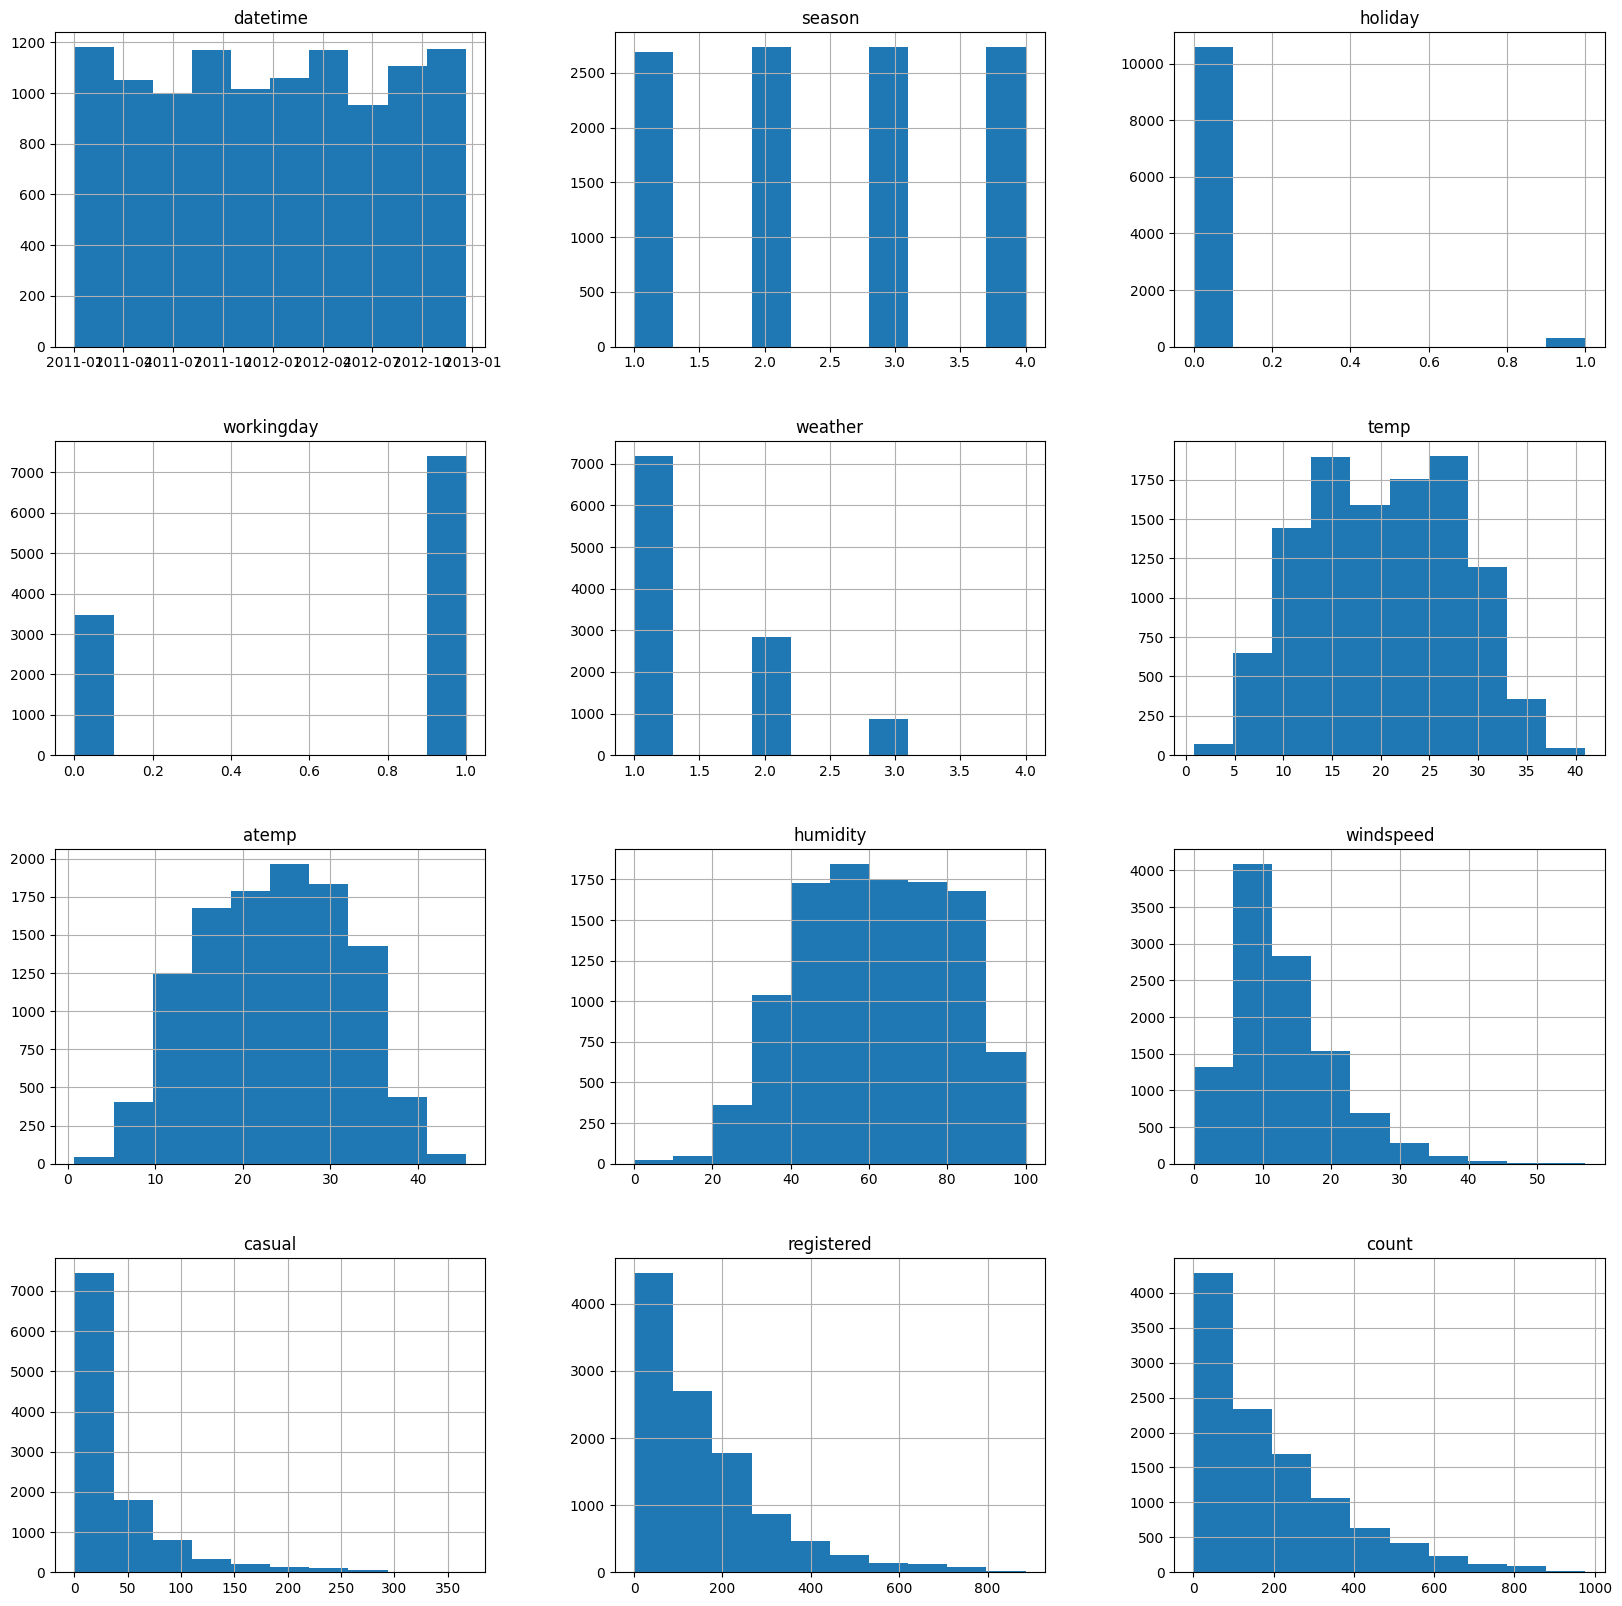

In [ ]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=[20,20])

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [ ]:
train["season"] = train["season"].astype('category')
train["weather"] = train["weather"].astype('category')
test["season"] = test["season"].astype('category')
test["weather"] = test["weather"].astype('category')

In [ ]:
train["hour"] = [t.hour for t in pd.DatetimeIndex(train.datetime)]
train["day"] = [t.dayofweek for t in pd.DatetimeIndex(train.datetime)]
train["month"] = [t.month for t in pd.DatetimeIndex(train.datetime)]
train['year'] = [t.year for t in pd.DatetimeIndex(train.datetime)]
train['year'] = train['year'].map({2011:0, 2012:1})
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5,1,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,5,1,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,5,1,0


In [ ]:
test["hour"] = [t.hour for t in pd.DatetimeIndex(test.datetime)]
test["day"] = [t.dayofweek for t in pd.DatetimeIndex(test.datetime)]
test["month"] = [t.month for t in pd.DatetimeIndex(test.datetime)]
test['year'] = [t.year for t in pd.DatetimeIndex(test.datetime)]
test['year'] = test['year'].map({2011:0, 2012:1})
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,day,month,year
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,3,1,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,3,1,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2,3,1,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,3,1,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4,3,1,0


### NOW LET'S SEE THE HOUR FEATURE AS IT VARIES WITH DIIFFERENT FEATURES

In [ ]:
# importing seaborn
import seaborn as sns

<Axes: xlabel='hour', ylabel='count'>

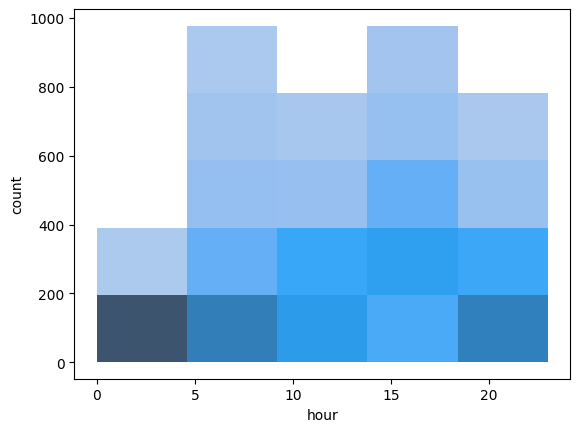

In [ ]:
# View histogram of all features again now with the hour feature
# With Count
sns.histplot(data=train,x="hour",y="count",bins=5)

<function matplotlib.pyplot.show(close=None, block=None)>

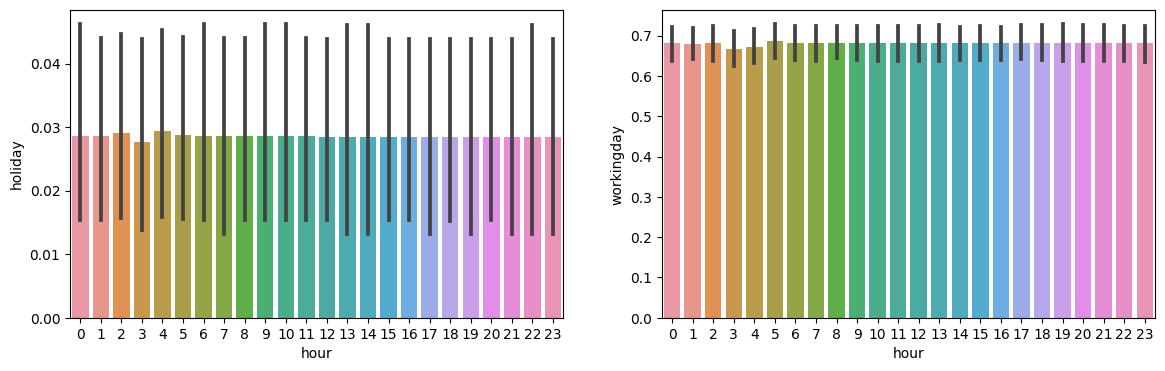

In [ ]:
# Establish the figure
plt.figure(figsize=[14,4])

# Using  holiday and workingday against hour

# For Holiday against hour
plt.subplot(1,2,1)
sns.barplot(data=train,x="hour",y="holiday")

# For workingday against hour
plt.subplot(1,2,2)
sns.barplot(data=train,x="hour",y="workingday")

plt.show

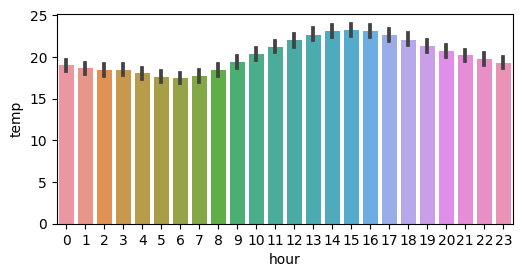

In [ ]:
# Establish the figure
plt.figure(figsize=[20,6])

# Using temp against hour

#For temp against temp
plt.subplot(2,3,1)
sns.barplot(data=train,x="hour",y="temp")

plt.show()

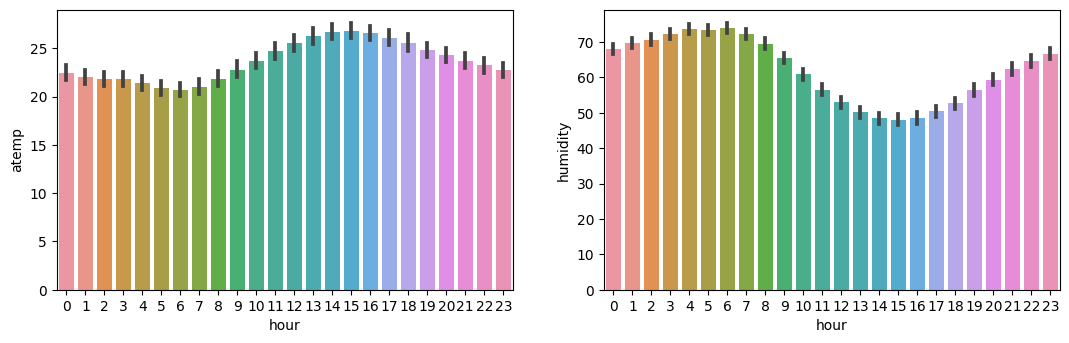

In [ ]:
# Establish the figure
plt.figure(figsize=[20,8])

# Using atemp and humidity against hour

plt.subplot(2,3,1)
sns.barplot(data=train,x="hour",y="atemp")

plt.subplot(2,3,2)
sns.barplot(data=train,x="hour",y="humidity")

plt.show()


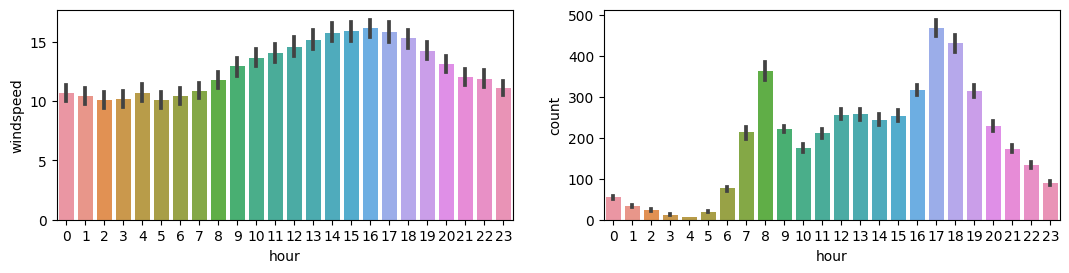

In [ ]:
# Establish the figure
plt.figure(figsize=[20,6])

# Using windspeed and count against hour

plt.subplot(2,3,2)
sns.barplot(data=train,x="hour",y="windspeed")

plt.subplot(2,3,3)
sns.barplot(data=train,x="hour",y="count")

plt.show()

# Using feature engineering to separate season as per values for the train data set
season = pd.get_dummies(train['season'],prefix='season')
train = pd.concat([train, season],axis=1)
train.head()


In [ ]:
# Using feature engineering to separate season as per values for the test data set
season = pd.get_dummies(test['season'],prefix='season')
test = pd.concat([test, season],axis=1)
test.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,day,month,year,season_1,season_2,season_3,season_4
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,3,1,0,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,3,1,0,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2,3,1,0,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,3,1,0,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4,3,1,0,1,0,0,0


In [ ]:

# Using feature engineering to separate weather as per values for the train data set
weather = pd.get_dummies(train['weather'],prefix='weather')
train = pd.concat([train, weather],axis=1)
train.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,1,0,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1,0,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5,1,0,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,5,1,0,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,5,1,0,1,0,0,0


In [ ]:
# Using feature engineering to separate seasson as per values for the train data set
weather = pd.get_dummies(test['weather'],prefix='weather')
test = pd.concat([test, weather],axis=1)
test.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,...,month,year,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,...,1,0,1,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,...,1,0,1,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2,...,1,0,1,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,...,1,0,1,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4,...,1,0,1,0,0,0,1,0,0,0


In [ ]:
predictor_added_features = TabularPredictor(label='count',
                                          learner_kwargs={"ignored_columns":["datetime","season","weather","casual","registered"]},
                                          problem_type='regression',
                                          eval_metric='root_mean_squared_error').fit(train_data=train,
                                                                                     time_limit=600,
                                                                                     presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230612_064909/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230612_064909/"
AutoGluon Version:  0.7.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 19
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['datetime', 'season', 'weather', 'casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11392.06 MB
	Train Data (Original)  Memory Usage: 0.91 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually spe

In [ ]:
predictor_added_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -34.108591      23.545157  499.044018                0.001349           0.526330            3       True         14
1      WeightedEnsemble_L2  -34.192124      21.397834  377.167045                0.001412           1.111170            2       True          8
2          CatBoost_BAG_L2  -34.357224      21.963547  421.383661                0.074894          45.208935            2       True         12
3     ExtraTreesMSE_BAG_L2  -34.484929      22.904709  386.845026                1.016056          10.670299            2       True         13
4          LightGBM_BAG_L2  -34.682924      22.034133  411.264930                0.145480          35.090204            2       True         10
5        LightGBMXT_BAG_L2  -35.002375      22.307378  407.548250         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -115.73323148534313,
  'KNeighborsDist_BAG_L1': -112.15711242835349,
  'LightGBMXT_BAG_L1': -36.88161055590965,
  'LightGBM_BAG_L1': -35.80087311148308,
  'RandomForestMSE_BAG_L1': -39.632667273368334,


In [ ]:
predictions_added_features = predictor_added_features.predict(test)
predictions_added_features.head()

0    10.740520
1     5.955927
2     4.743192
3     4.377336
4     4.242582
Name: count, dtype: float32

In [ ]:
predictions_added_features.describe()

count    6493.000000
mean      190.397156
std       175.119934
min         2.423645
25%        45.789780
50%       147.661499
75%       282.377899
max       893.537354
Name: count, dtype: float64

In [ ]:
# Checking for the total amount of results less than 0
(predictions_added_features<0).sum()

0

In [ ]:
#predictions_new[predictions_new<0] =0
#(predictions_new<0).sum()

In [ ]:
# Same thing as train and test dataset
submission_added_features = pd.read_csv('sampleSubmission.csv')
submission_added_features.loc[:,'datetime'] = pd.to_datetime(submission_added_features.loc[:,'datetime'])
submission_added_features.head()

<ipython-input-41-37d56dfe6ff3>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  submission_added_features.loc[:,'datetime'] = pd.to_datetime(submission_added_features.loc[:,'datetime'])


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [ ]:
# Same submitting predictions for new features
submission_added_features["count"] = predictions_added_features
submission_added_features.to_csv("submission_added_features.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_added_features.csv -m "new features"

100% 188k/188k [00:02<00:00, 86.6kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                       date                 description                          status    publicScore  privateScore  
-----------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_added_features.csv  2023-06-12 09:30:53  new features                         complete  0.46618      0.46618       
submission_new_features.csv    2023-06-12 08:38:46  newly added features                 complete  0.56602      0.56602       
submission_new_hpo3.csv        2023-06-12 07:32:04  new features with hyperparameters 3  complete  0.64240      0.64240       
submission_new_hpo2.csv        2023-06-12 07:19:42  new features with hyperparameters 2  complete  0.53619      0.53619       


#### New Score of `0.46618|`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [ ]:
#hpo1   hyperparameter="NN", hyperparameter_tune_kwargs="auto"
predictor_new_hpo1 = TabularPredictor(label="count",
                                      learner_kwargs={"ignored_columns":["datetime","season","weather","casual","registered"]},
                                      problem_type='regression',
                                      eval_metric="root_mean_squared_error").fit(train_data=train,
                                                                      time_limit=600,
                                                                        hyperparameters={'NN_TORCH': {'num_epochs': 10,
                                                                                        'activation': 'relu', 
                                                                                        'dropout_prob': 0.5}},
                                                                        hyperparameter_tune_kwargs='auto',
                                                                         presets="best_quality")

Fitted model: NeuralNetTorch_BAG_L2/8f2e6546 ...
	-69.4025	 = Validation score   (-root_mean_squared_error)
	62.87s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L2/830e256e ...
	-66.3504	 = Validation score   (-root_mean_squared_error)
	77.02s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L2/5ed24930 ...
	-67.0681	 = Validation score   (-root_mean_squared_error)
	63.41s	 = Training   runtime
	0.0s	 = Validation runtime
Completed 1/20 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L3 ... Training model for up to 360.0s of the 20.84s of remaining time.
	-65.4202	 = Validation score   (-root_mean_squared_error)
	0.2s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 579.38s ... Best model: "WeightedEnsemble_L3"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20230612_070035/")


In [ ]:
predictor_new_hpo1.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                            model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0             WeightedEnsemble_L3  -65.420156       0.002030  556.889797                0.000692           0.195997            3       True          9
1  NeuralNetTorch_BAG_L2/830e256e  -66.350358       0.001027  430.414145                0.000199          77.021379            2       True          7
2  NeuralNetTorch_BAG_L2/5ed24930  -67.068097       0.000971  416.807092                0.000144          63.414326            2       True          8
3  NeuralNetTorch_BAG_L2/8f2e6546  -69.402538       0.000995  416.258094                0.000167          62.865328            2       True          6
4             WeightedEnsemble_L2  -70.254899       0.001442  180.526744                0.000997           0.456264            2       True          5
5  NeuralNetTorch_BAG_L1/1c5992a

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'NeuralNetTorch_BAG_L1/2eec05ff': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'NeuralNetTorch_BAG_L1/e523b644': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'NeuralNetTorch_BAG_L1/1c5992a7': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'NeuralNetTorch_BAG_L1/54121e90': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'NeuralNetTorch_BAG_L2/8f2e6546': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'NeuralNetTorch_BAG_L2/830e256e': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'NeuralNetTorch_BAG_L2/5ed24930': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'NeuralNetTorch_BAG_L1/2eec05ff': -113.80979610864698,
  'NeuralNetTorch_BAG_L1/e523b644': -98.0530316614585,
  'NeuralNetTorch_BAG_L1/1c5992a7': -70.26992432713335,
  'NeuralNetTorch_BAG_L1/54121e90': -251.50045297395891,
  'WeightedEnsemble_L2': -70.25489924503414,
  'NeuralNetTorch_B

In [ ]:
# Remember to set all negative values to zero for "Hpo 1"
predictions_new_hpo1 = predictor_new_hpo1.predict(test)

In [ ]:
predictions_new_hpo1.describe()

count    6493.000000
mean      189.346954
std       163.895172
min         6.989261
25%        35.949005
50%       164.287201
75%       281.425842
max       674.257690
Name: count, dtype: float64

In [ ]:
#Sum of all negative values in "HPO 1"
(predictions_new_hpo1<0).sum()

0

In [ ]:
# Same thing as train and test dataset for "HPO 1"
submission_new_hpo1 = pd.read_csv('sampleSubmission.csv')
submission_new_hpo1.loc[:,'datetime'] = pd.to_datetime(submission_new_hpo1.loc[:,'datetime'])
submission_new_hpo1.head()

<ipython-input-50-a906b836c43d>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  submission_new_hpo1.loc[:,'datetime'] = pd.to_datetime(submission_new_hpo1.loc[:,'datetime'])


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [ ]:
# Same submitting predictions for "HPO 1"
submission_new_hpo1["count"] = predictions_new_hpo1
submission_new_hpo1.to_csv("submission_new_hpo1.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo1.csv -m "new features with hyperparameters 1"

100% 188k/188k [00:01<00:00, 115kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_hpo1.csv      2023-06-12 07:10:20  new features with hyperparameters 1  complete  0.59439      0.59439       
submission_new_features.csv  2023-06-12 07:00:34  new features                         complete  1.16910      1.16910       
submission.csv               2023-06-12 06:48:49  first raw submission                 complete  1.80162      1.80162       
submission_new_hpo1.csv      2023-06-12 06:17:33  new features with hyperparameters 1  complete  1.11032      1.11032       


#### New Score of `0.59439`

## Hyper parameter optimization 2

In [ ]:
#hpo2   hyperparameter='GBM', hyperparameter_tune_kwargs="random"
predictor_new_hpo2 = TabularPredictor(label="count",
                                      learner_kwargs={"ignored_columns":["datetime","season","weather","casual","registered"]},
                                      problem_type='regression',
                                      eval_metric="root_mean_squared_error").fit(train_data=train,
                                                                      time_limit=600,
                                                                        hyperparameters={'GBM': {'num_boost_round': 1000, 
                                                                                                 'learning_rate': 0.01}},
                                                                        hyperparameter_tune_kwargs='random',
                                                                         presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230612_071022/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230612_071022/"
AutoGluon Version:  0.7.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 19
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['datetime', 'season', 'weather', 'casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11307.12 MB
	Train Data (Original)  Memory Usage: 0.91 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually spe

In [ ]:
predictor_new_hpo2.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2 -36.850820       0.001803  168.685691                0.001328           0.658278            2       True          7
1   WeightedEnsemble_L3 -37.098682       0.003150  524.372047                0.001485           0.462412            3       True         12
2    LightGBM_BAG_L1/T2 -37.134678       0.000159   64.310503                0.000159          64.310503            1       True          2
3    LightGBM_BAG_L2/T1 -37.229913       0.001128  370.865617                0.000166          53.752136            2       True          8
4    LightGBM_BAG_L2/T3 -37.232872       0.001116  362.125988                0.000154          45.012507            2       True         10
5    LightGBM_BAG_L1/T6 -37.244577       0.000157   53.727294                0.000157          53.

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T5': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T6': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T4': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -38.881873943945834,
  'LightGBM_BAG_L1/T2': -37.134677910312476,
  'LightGBM_BAG_L1/T3': -39.30054995312037,
  'LightGBM_BAG_L1/T4': -37.721011436104185,
  'LightGBM_BAG_L1/T5': -39.12049788918879,
  'LightGBM_BAG_L1/T6': -37.244577498147535,
  'WeightedEnsemble_L2': -36.85081968306247,
  'LightGBM_BAG_L2/T1': -37.22

In [ ]:
# Remember to set all negative values to zero for "Hpo 2"
predictions_new_hpo2 = predictor_new_hpo2.predict(test)

In [ ]:
predictions_new_hpo2.describe()

In [ ]:
#Sum of all negative values in "HPO 2"
predictions_new_hpo2[predictions_new_hpo2<0] =0
(predictions_new_hpo2<0).sum()

In [ ]:
predictions_new_hpo2.describe()

count    6493.000000
mean      190.234573
std       174.039825
min         0.000000
25%        46.422092
50%       147.385376
75%       282.895050
max       928.869873
Name: count, dtype: float64

In [ ]:
# Same thing as train and test dataset for "HPO 2"
submission_new_hpo2 = pd.read_csv('sampleSubmission.csv')
submission_new_hpo2.loc[:,'datetime'] = pd.to_datetime(submission_new_hpo2.loc[:,'datetime'])
submission_new_hpo2.head()

<ipython-input-60-3c92fa3234ac>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  submission_new_hpo2.loc[:,'datetime'] = pd.to_datetime(submission_new_hpo2.loc[:,'datetime'])


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [ ]:
# Same submitting predictions for "HPO 2"
submission_new_hpo2["count"] = predictions_new_hpo2
submission_new_hpo2.to_csv("submission_new_hpo2.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo2.csv -m "new features with hyperparameters 2"

100% 188k/188k [00:01<00:00, 178kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_hpo2.csv      2023-06-12 07:19:42  new features with hyperparameters 2  complete  0.53619      0.53619       
submission_new_hpo1.csv      2023-06-12 07:10:20  new features with hyperparameters 1  complete  0.59439      0.59439       
submission_new_features.csv  2023-06-12 07:00:34  new features                         complete  1.16910      1.16910       
submission.csv               2023-06-12 06:48:49  first raw submission                 complete  1.80162      1.80162       


#### New Score of `0.53619`

## Hyper parameter optimization 3

In [ ]:
#hpo3   hyperparameter='XGB', hyperparameter_tune_kwargs="auto"
predictor_new_hpo3 = TabularPredictor(label="count",
                                      learner_kwargs={"ignored_columns":["datetime","season","weather","casual","registered"]},
                                      problem_type='regression',
                                      eval_metric="root_mean_squared_error").fit(train_data=train,
                                                                      time_limit=600,
                                                                        hyperparameters={'XGB': {'n_estimators': 10000, 
                                                                                                 'learning_rate': 0.0001}},
                                                                        hyperparameter_tune_kwargs= 'random',
                                                                        presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230612_071943/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230612_071943/"
AutoGluon Version:  0.7.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 19
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['datetime', 'season', 'weather', 'casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11766.05 MB
	Train Data (Original)  Memory Usage: 0.91 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually spe

In [ ]:
predictor_new_hpo3.fit_summary()

In [ ]:
# Remember to set all negative values to zero for "Hpo 3"
predictions_new_hpo3 = predictor_new_hpo3.predict(test)

In [ ]:
predictions_new_hpo3.describe()

In [ ]:
#Sum of all negative values in "HPO 3"
(predictions_new_hpo3<0).sum()

In [ ]:
# Same thing as train and test dataset for "HPO 3"
submission_new_hpo3 = pd.read_csv('sampleSubmission.csv')
submission_new_hpo3.loc[:,'datetime'] = pd.to_datetime(submission_new_hpo3.loc[:,'datetime'])
submission_new_hpo3.head()

In [ ]:
# Same submitting predictions for "HPO 3"
submission_new_hpo3["count"] = predictions_new_hpo3
submission_new_hpo3.to_csv("submission_new_hpo3.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo3.csv -m "new features with hyperparameters 3"

100% 189k/189k [00:01<00:00, 107kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                       date                 description                          status    publicScore  privateScore  
-----------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_hpo3.csv        2023-06-12 09:33:07  new features with hyperparameters 3  complete  0.64240      0.64240       
submission_added_features.csv  2023-06-12 09:30:53  new features                         complete  0.46618      0.46618       
submission_new_features.csv    2023-06-12 08:38:46  newly added features                 complete  0.56602      0.56602       
submission_new_hpo3.csv        2023-06-12 07:32:04  new features with hyperparameters 3  complete  0.64240      0.64240       


#### New Score of `0.64240`

In [ ]:
# Function to filters the humidity column to humid and not humid
def filter_humidity(x):
  if x <= 50:
    return "not humid"
  if x > 50:
    return "humid"

# Function to filters the windy column to very windy and mild wind
def filter_windspeed(x):
  if x < 11:
    return "mild windy"
  if x >= 11:
    return "very windy"

# Function to filters the temp column to hot,cold or mild temperature
def filter_temp(x):
  if x <= 15:
    return "cold temp"
  if x > 15 and x <= 22:
    return "mild temp"
  if x > 22:
    return "hot temp"

# Function that filters the morning, lunch and evening rush hour
def filter_rush_hour(x):
  if x>=7 and x<=9:
    return "morning rush hour"
  if x>=11 and x<=13:
    return "lunch rush hour"
  if x>=17 and x<=18:
    return "evening rush hour"

In [ ]:
train['humidity_category'] = train['humidity'].apply(filter_humidity)
train['windy_category'] = train['windspeed'].apply(filter_windspeed)
train['temp_category'] = train['temp'].apply(filter_temp)
#train['rush_hour'] = train['hour'].apply(filter_rush_hour)
#train.drop(['rush_hour'], inplace=True, axis=1)
train.head()

In [ ]:
test['humidity_category'] = test['humidity'].apply(filter_humidity)
test['windy_category'] = test['windspeed'].apply(filter_windspeed)
test['temp_category'] = test['temp'].apply(filter_temp)
#train['rush_hour'] = train['hour'].apply(filter_rush_hour)
#train.drop(['rush_hour'], inplace=True, axis=1)
test.head()

In [ ]:
# Using feature engineering to separate humidity, windspeed and tempertures as per values for the train dat set
humidity = pd.get_dummies(train['humidity_category'],prefix='humidity')
train = pd.concat([train, humidity],axis=1)
windy = pd.get_dummies(train['windy_category'],prefix='windy')
train = pd.concat([train, windy],axis=1)
temp = pd.get_dummies(train['temp_category'],prefix='temp')
train = pd.concat([train, temp],axis=1)
train.head(n=10)

In [ ]:
# Using feature engineering to separate humidity, windspeed and tempertures as per values for the test dataset
humidity = pd.get_dummies(test['humidity_category'],prefix='humidity')
test = pd.concat([test, humidity],axis=1)
windy = pd.get_dummies(test['windy_category'],prefix='windy')
test = pd.concat([test, windy],axis=1)
temp = pd.get_dummies(test['temp_category'],prefix='temp')
test = pd.concat([test, temp],axis=1)
test.head()

### NEW FEATURES

In [ ]:
# new features
predictor_new_features = TabularPredictor(label="count",
                                      learner_kwargs={"ignored_columns":["datetime","season","weather","casual","registered",
                                                                         'temp','humidity','windspeed','humidity_category',
                                                                         'windy_category','temp_category']},
                                      problem_type='regression',
                                      eval_metric="root_mean_squared_error").fit(train_data=train,
                                                                                time_limit=600,
                                                                                presets="best_quality")

In [ ]:
predictor_new_features.fit_summary()

In [ ]:
# Remember to set all negative values to zero for "NEW FEATURES"
predictions_new_features = predictor_new_features.predict(test)

In [ ]:
#Sum of all negative values in "NEW FEATURES"
(predictions_new_features<0).sum()

In [ ]:
#Sum of all negative values in "HPO 4"
predictions_new_features[predictions_new_features<0] =0
(predictions_new_features<0).sum()

In [ ]:
# Same thing as train and test dataset for "HPO 4"
submission_new_features = pd.read_csv('sampleSubmission.csv')
submission_new_features.loc[:,'datetime'] = pd.to_datetime(submission_new_features.loc[:,'datetime'])
submission_new_features.head()

In [ ]:
# Same submitting predictions for "HPO 4"
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "newly added features "

100% 188k/188k [00:02<00:00, 82.5kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_features.csv  2023-06-12 08:38:46  newly added features                 complete  0.56602      0.56602       
submission_new_hpo3.csv      2023-06-12 07:32:04  new features with hyperparameters 3  complete  0.64240      0.64240       
submission_new_hpo2.csv      2023-06-12 07:19:42  new features with hyperparameters 2  complete  0.53619      0.53619       
submission_new_hpo1.csv      2023-06-12 07:10:20  new features with hyperparameters 1  complete  0.59439      0.59439       


<ipython-input-102-fc3cbe64da3c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_mat= train[:].corr()


<Axes: >

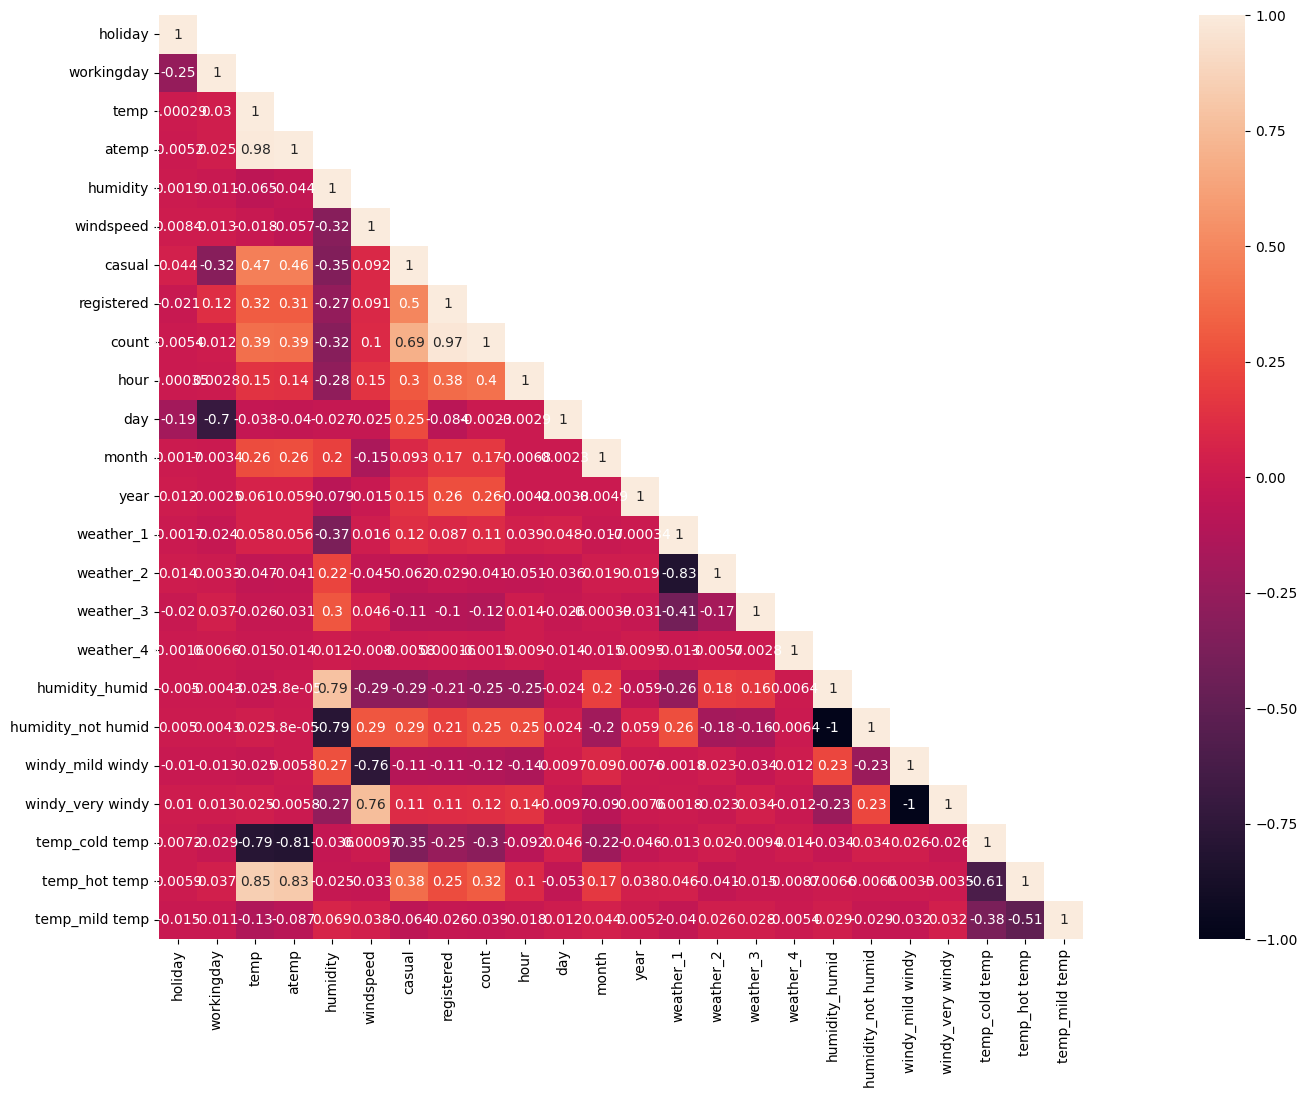

In [ ]:
cor_mat= train[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

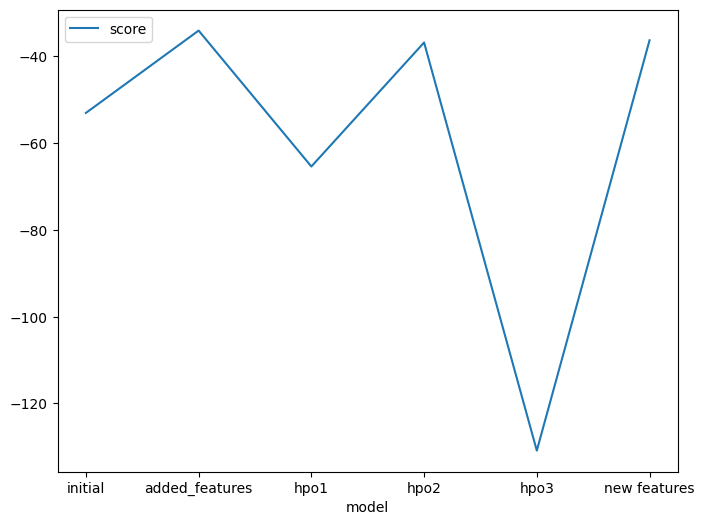

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "added_features", "hpo1", "hpo2", "hpo3", "new features"],
        "score": [
            predictor.leaderboard(silent=True)['score_val'][0],
            predictor_added_features.leaderboard(silent=True)['score_val'][0],
            predictor_new_hpo1.leaderboard(silent=True)['score_val'][0],
            predictor_new_hpo2.leaderboard(silent=True)['score_val'][0],
            predictor_new_hpo3.leaderboard(silent=True)['score_val'][0],
            predictor_new_features.leaderboard(silent=True)['score_val'][0]
        ]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

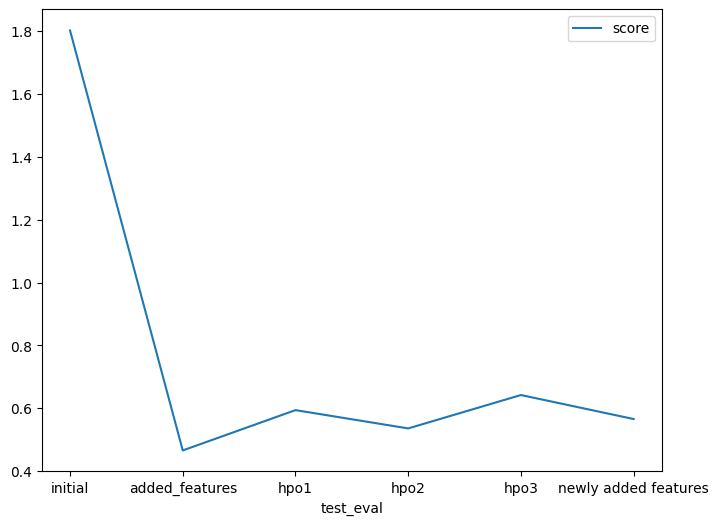

In [ ]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "added_features", "hpo1", "hpo2","hpo3","newly added features"],
        "score": [1.80162, 0.46618, 0.59439, 0.53619, 0.64240, 0.56602]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [105]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo_model_score", "kaggle_score"],
    "hpo1": [predictor.leaderboard(silent=True)['score_val'][0],
             predictor_added_features.leaderboard(silent=True)['score_val'][0],
             predictor_new_hpo1.leaderboard(silent=True)['score_val'][0],
             0.59439],
    "hpo2": [predictor.leaderboard(silent=True)['score_val'][0],
             predictor_added_features.leaderboard(silent=True)['score_val'][0],
             predictor_new_hpo2.leaderboard(silent=True)['score_val'][0], 
             0.53619],
    "hpo3": [predictor.leaderboard(silent=True)['score_val'][0],
             predictor_added_features.leaderboard(silent=True)['score_val'][0], 
             predictor_new_hpo3.leaderboard(silent=True)['score_val'][0], 
             0.64240],
    "add more features": [predictor.leaderboard(silent=True)['score_val'][0], 
                          predictor_added_features.leaderboard(silent=True)['score_val'][0], 
                          predictor_new_features.leaderboard(silent=True)['score_val'][0], 
                          0.56602],
})

,model,hpo1,hpo2,hpo3,add more features
0,initial,-53.080362,-53.080362,-53.080362,-53.080362
1,add_features,-34.108591,-34.108591,-34.108591,-34.108591
2,hpo_model_score,-65.420156,-36.850820,-130.861534,-36.348944
3,kaggle_score,0.594390,0.536190,0.642400,0.566020
